# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Torero, William Klien
_Student No._: 2022-10739
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: October 6, 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**
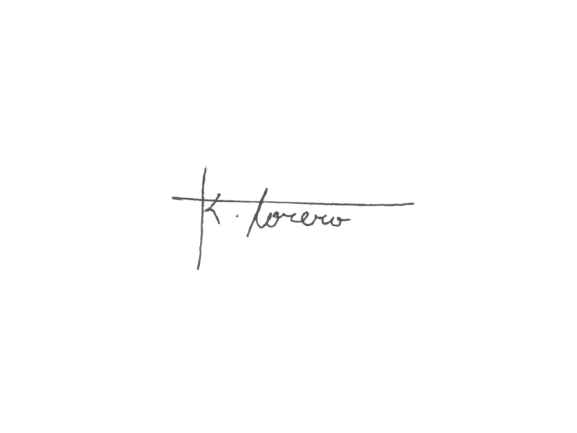

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [32]:
# Problem #1
from numpy import array
from numpy.linalg import eigh # importing the numpy linear algebra package that solves both eigenvalues and eigenvectors for symmetric matrices

# We first define the given matrix to be solved
A = np.array([[8, -2, -20],
              [-2, -3, -9],
              [-20, -9, -3]])

# Solving both eigenvalues and eigenvectors of symmetric matrix A using numpy's function linalg
eigenvalues, eigenvectors = eigh(A)

# Setting the acquired eigenvalues as the diagonal element of a diagonal matrix D
D = np.diag(eigenvalues)

# Solving the left-hand-side of AV=VD equation
AV = A @ eigenvectors # Matrix multiplication of A and eigenvectors
# Solving the right-hand-side of AV=VD equation
DV = eigenvectors @ D # Matrix multiplication of eigenvectors and D

# Showing the acquired eigenvalues
print("Eigenvalues:")
print(eigenvalues)

# Showing the acquired eigenvectors
print("Eigenvectors (V):")
print(eigenvectors)

# Showing the diagonal matrix with eigenvalues as diagonal entries
print("Diagonal matrix (D):")
print(D)

# Printing the LHS of AV=VD equation
print("A * V:")
print(AV)

# Printing the RHS of AV=VD equation
print("V * D:")
print(DV)

# Checking of AV=VD is indeed true using numpy's function allclose
print("Is A * V approximately equal to V * D?")
print(np.allclose(AV, DV))

#Solving for the percent error of the calculated AV=VD
absolute_error = np.abs(AV - DV) # Calculate first the absolute error between AV and DV

denominator = np.where(AV == 0, 1e-10, np.abs(AV)) # Preventing division by 0 by replacing zero entries from AV with a very small value (1e-10); otherwise, take the absolute value of AV as denominator

relative_error = absolute_error / denominator # Calculate the relative error

percent_error = relative_error * 100 # Converting the relative error into percentage form

average_percent_error = np.mean(percent_error) # Calculating the mean of the values within the calculated matrix of percent error to get a single value

# Showing the average percent error
print("Percent Error of the Matrix:")
print(percent_error) # Matrix form
print(average_percent_error) # Overall error

Eigenvalues:
[-21.99606195   0.16021522  23.83584674]
Eigenvectors (V):
[[ 0.52496527  0.36793396 -0.76748685]
 [ 0.40892672 -0.89987151 -0.15169114]
 [ 0.74645187  0.2342133   0.62285932]]
Diagonal matrix (D):
[[-21.99606195   0.           0.        ]
 [  0.           0.16021522   0.        ]
 [  0.           0.          23.83584674]]
A * V:
[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]
V * D:
[[-11.54716868   0.05894862 -18.29369893]
 [ -8.99477756  -0.14417311  -3.61568676]
 [-16.4190016    0.03752454  14.8463793 ]]
Is A * V approximately equal to V * D?
True
Percent Error of the Matrix:
[[1.53834839e-14 1.01231357e-12 0.00000000e+00]
 [1.97487579e-14 7.31559351e-13 3.68468763e-14]
 [2.16378180e-14 1.16497196e-12 5.98245809e-14]]
3.4025404414143773e-13


### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

Solution of x for c=2 is x=0.7984747083247583


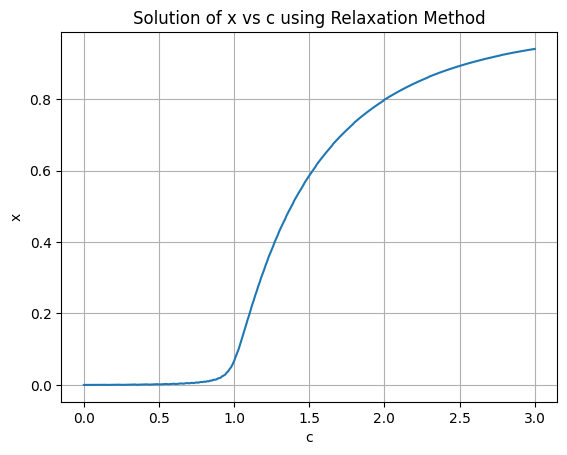

In [33]:
# Problem 2
from numpy import array, linspace
from math import exp
import matplotlib.pyplot as plt

# Defining the given function specifying the given parameters
def f(x, c):
    return 1 - exp(-c*x)

# Defining the relaxation method that will repeatedly solve for x within the given tolerance
def relaxation_method(x, c, tolerance):
  x_previous = x # The initial value of x
  x_new = f(x, c) # The new value of x using x_previous
  while abs(x_new - x_previous) > tolerance: # Setting a while loop until the difference between the previous and new value of x is within tolerance
    x_previous = x_new # Updating the previous value of x to be the new one
    x_new = f(x_new, c) # Computing the newer value of x using the updated value of x_new
  return x_new

# Defining the tolerance for the function to converge
tolerance = 1*exp(-6)

# Calculating the solution at c=2 with the predicted value of x=1
solution = relaxation_method(1, 2, tolerance)
print(f"Solution of x for c=2 is x={solution}") # Showing the solution of x at c=2
C = linspace(0, 3, 300+1) # Setting an array with values of 0 to 3 with an increment of 0.01 hence it will be 301 equally spaced value from the given range
X = array([relaxation_method(1, i, tolerance) for i in C]) # Applying the 301 values of c with an increment of 0.01 to the relaxation method

# Plotting the C corresponding the X (x_new)
plt.plot(C, X)
plt.xlabel("c")
plt.ylabel("x")
plt.title("Solution of x vs c using Relaxation Method")
plt.grid()
plt.show()

# The graph shows that for small values of c, the graph converge very slow
# This is because the exponential term dominates the c value
# As the c value increases, the graph coverge a lot faster and it approached the value of x=1
# This shows that x=1 is a solution to the relaxation method because the graph converges near the value of x=1

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [37]:
# Problem 3
R = 3.844e8 # Distance between Earth and Moon in m
M = 5.974e24 # Mass of the Earth in kg
m = 7.348e22 # Mass of the Moon in kg
G = 6.674e-11 # Gravitational constant in N*m**2/kg**2
W = 2.662e-6 # Angular velocity of the system in rad/s

# Defining the function to use from the given equation
def f(r):
  return (G*M/r**2 - G*m/(R-r)**2)/W**2

# Take the derivative of the original function with respect to r
def df(r):
  return (-2*G*M/r**3 - 2*G*m/(R-r)**3)/W**2

# Defining the tolerance to converge using Newton's method
tolerance = 10e-4

# Defining the Newton's method that will find the root of f(r)=0 starting with the initial guess of r
def newtons_method(r, tolerance):
  r_previous = r # Initial guess for r
  r_new = r-f(r)/df(r) # Perform the first Newton's method that will be the new value of r
  while abs(r_new - r_previous) > tolerance: # Setting a while loop until the difference between the previous and new value of r is within tolerance
    r_previous = r_new # Updating the previous value of r to be the new one
    r_new = r_new-f(r_new)/df(r_new) # Replacing the new r with a newer r using Newton's method
  return r_new

# Showing the final solution to the problem found using Newton's method setting r=10000 as the initial guess
print(newtons_method(10000, tolerance))

346024120.78915304
